In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")
data_test=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

**Preliminary data analysis**

---





In [ ]:
data_train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [ ]:
print(data_train.shape)
print(data_test.shape)

(762, 79)
(225, 79)


This training dataset has 762 training data samples

Training data information whether the data types are character or numerical values

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

In the total 79 columns, Genotype and Treatment_Behaviour columns are character data types
  

Checking for the number of unique values in each column and number of null entries in columns

In [ ]:
#checking the unique values
for col in data_train.columns.values:
  list_vals = pd.unique(data_train[col])
  print(col + " is of type " + str(data_train[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(data_train[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])


DYRK1A_N is of type float64 has 762 unique values, and 0 null entries
ITSN1_N is of type float64 has 761 unique values, and 0 null entries
BDNF_N is of type float64 has 762 unique values, and 0 null entries
NR1_N is of type float64 has 762 unique values, and 0 null entries
NR2A_N is of type float64 has 762 unique values, and 0 null entries
pAKT_N is of type float64 has 762 unique values, and 0 null entries
pBRAF_N is of type float64 has 760 unique values, and 0 null entries
pCAMKII_N is of type float64 has 762 unique values, and 0 null entries
pCREB_N is of type float64 has 762 unique values, and 0 null entries
pELK_N is of type float64 has 762 unique values, and 0 null entries
pERK_N is of type float64 has 762 unique values, and 0 null entries
pJNK_N is of type float64 has 761 unique values, and 0 null entries
PKCA_N is of type float64 has 762 unique values, and 0 null entries
pMEK_N is of type float64 has 762 unique values, and 0 null entries
pNR1_N is of type float64 has 762 unique 

1.   **BAD_N** has 180 null entries
2.   **BCL2_N** has 195 null entries
3.   **PCFOS_N** has 60 null entries
4.   **H3AcK18_N** has 150 null entries
5.   **EGR1_N** has 180 null entries
6.   **H3Mek4_N** has 180 null entries
7.   **ELK_N** has 15 null entries
8.  **Bcatenin_N** has 15 null entries
9.   **MEK_N** has 4 null entries
10. **Genotype** has 2 unique strings: Control,Ts65Dn. We need to convert these strings into either 0 or 1
11. **Treatment_Behaviour** has 4 unique strings: Memantine_C/S, Memantime_S/C,
Saline_C/S,Saline_S/C. We need to convert these strings into int values
12. **Genotype**(Binary), **Treatment_Behaviour**(Multi class) are the dependant variables



















In [ ]:
data_train.isna().sum()

DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64

EGR1_N, H3MeK4_N had more NaN and null values, these coulmns will be taken care in Iterative Imputation.

#**Histogram**

Plot the histogram of variables to see the distribution

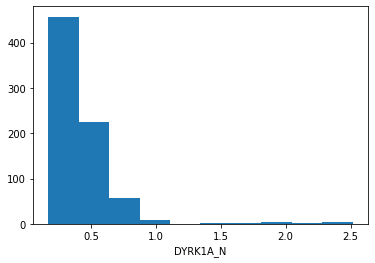

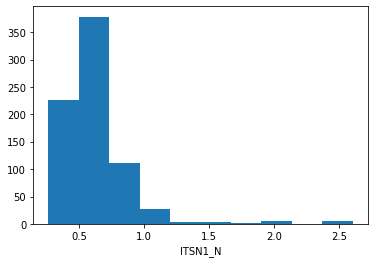

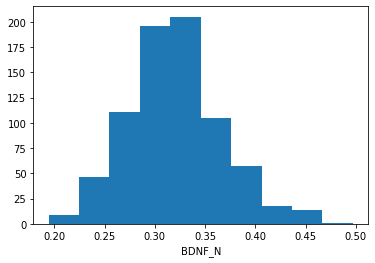

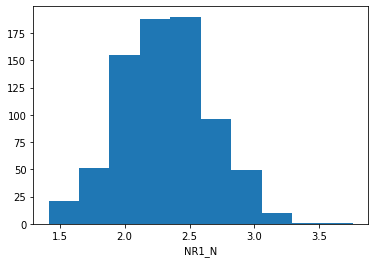

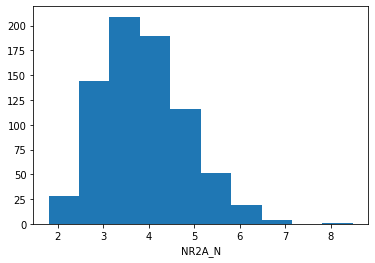

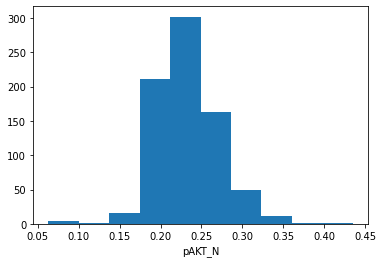

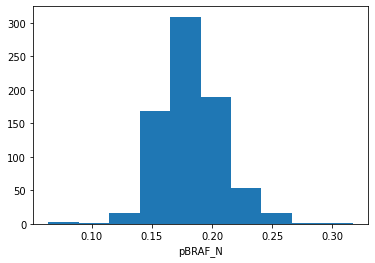

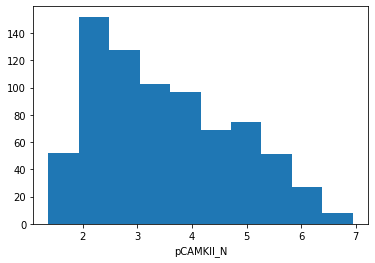

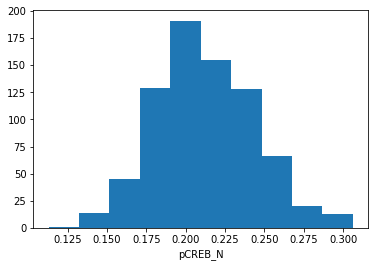

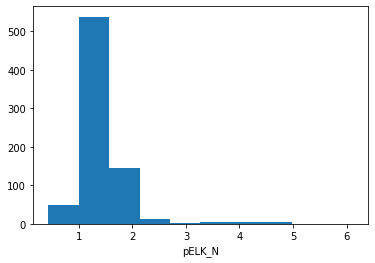

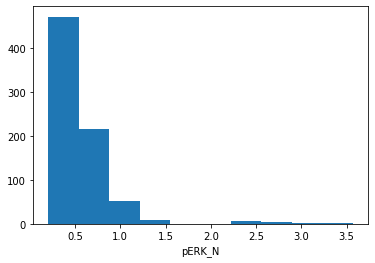

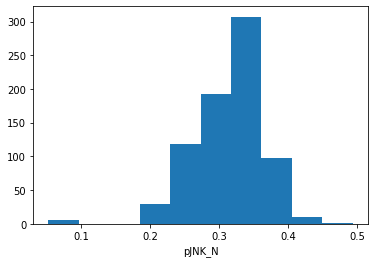

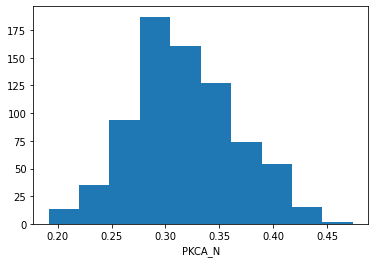

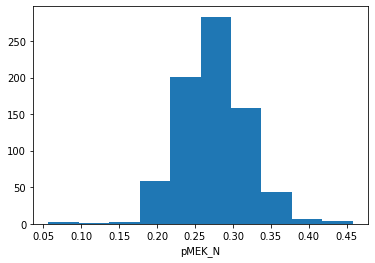

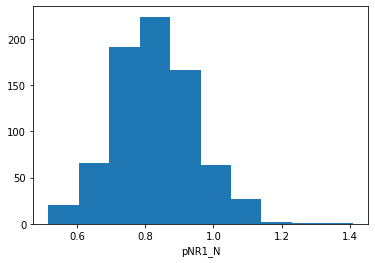

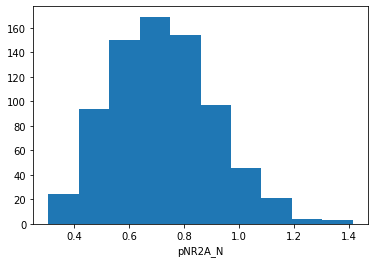

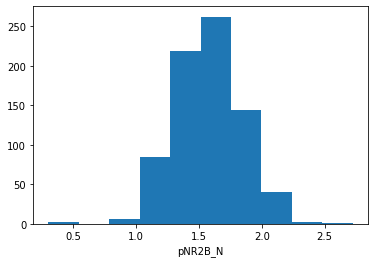

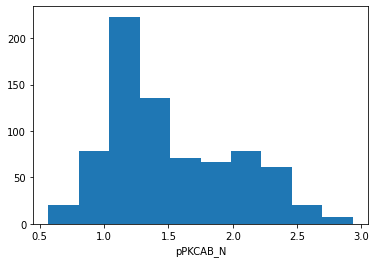

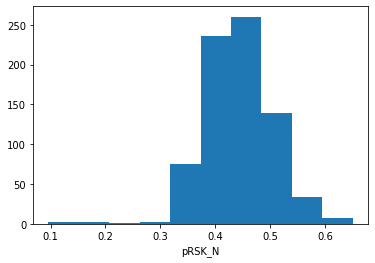

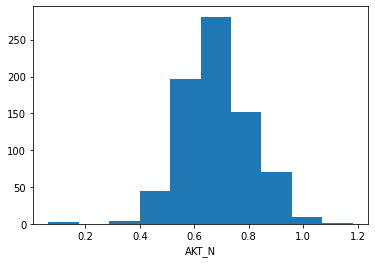

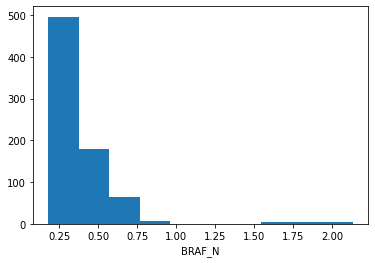

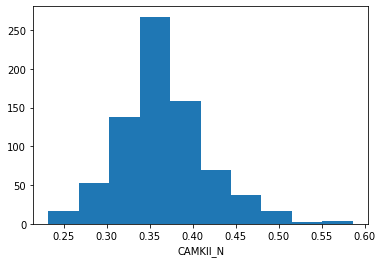

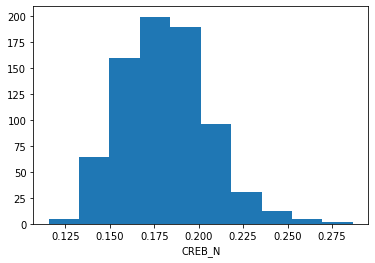

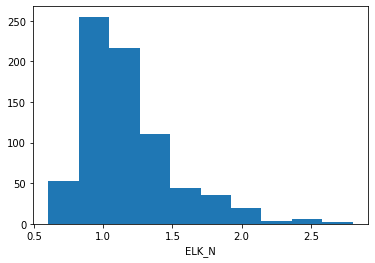

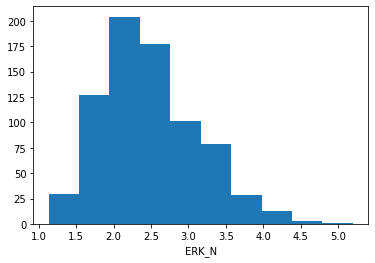

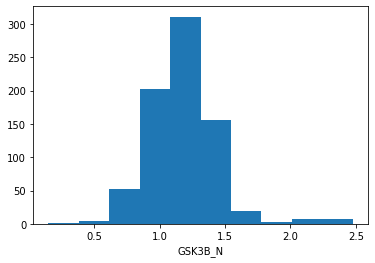

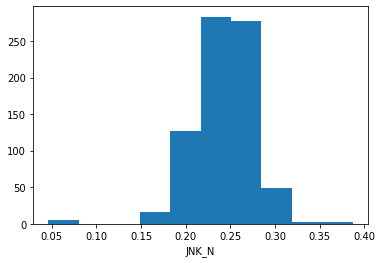

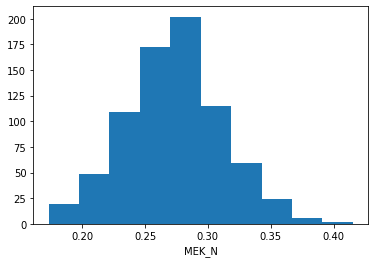

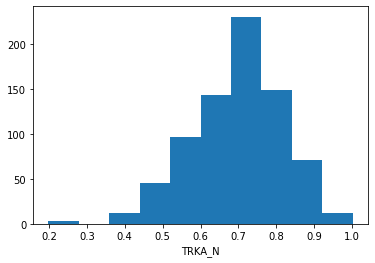

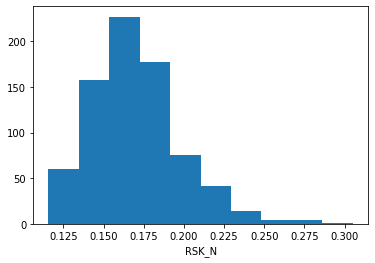

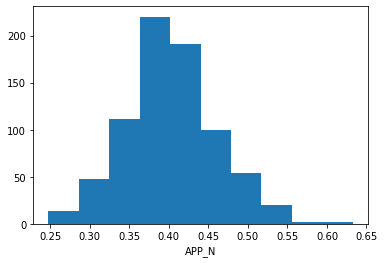

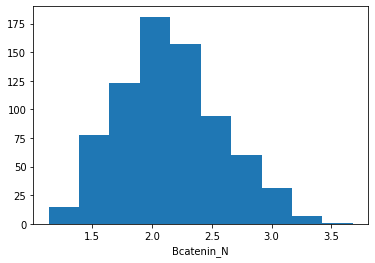

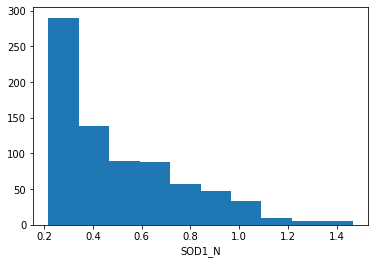

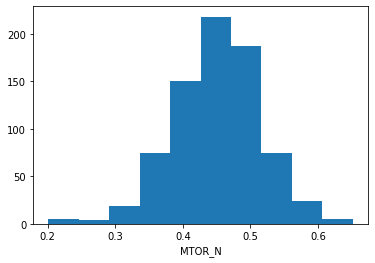

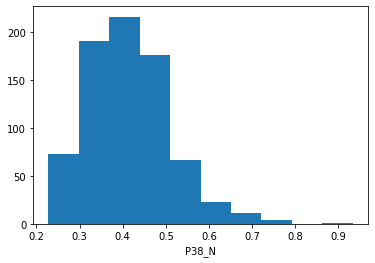

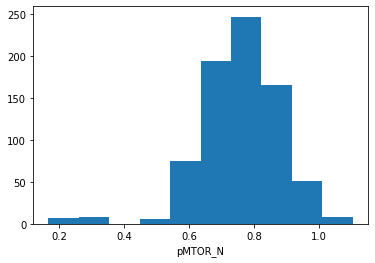

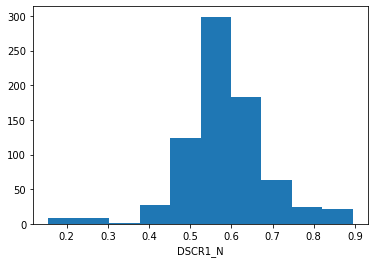

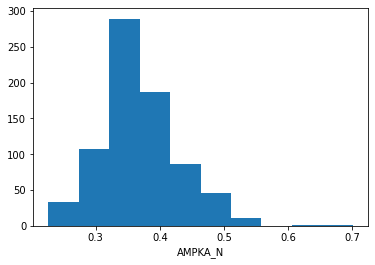

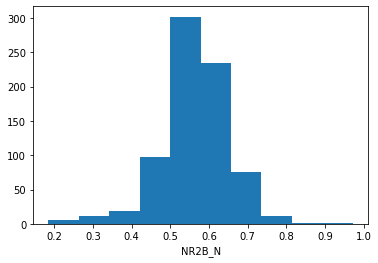

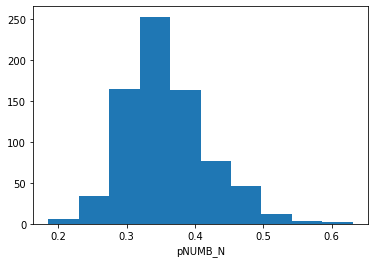

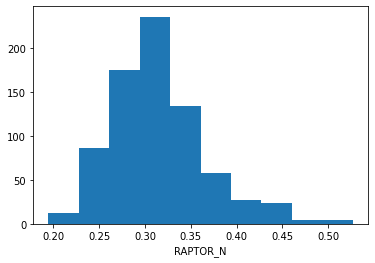

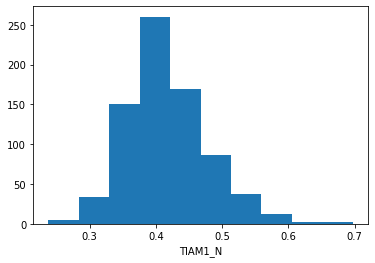

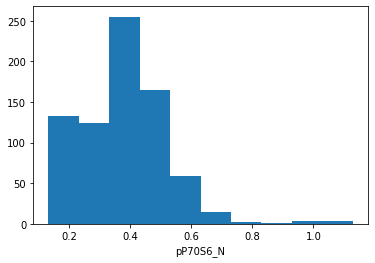

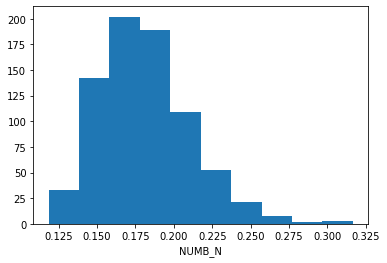

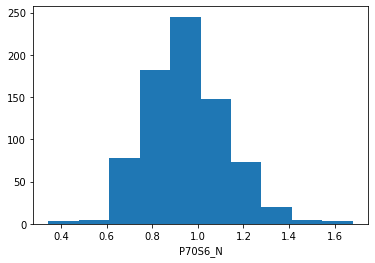

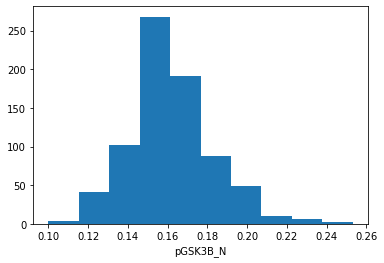

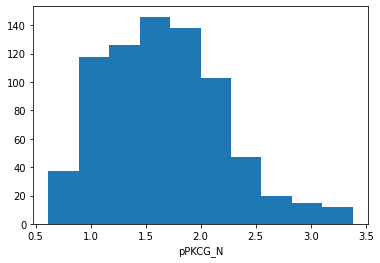

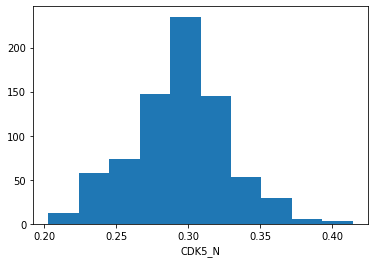

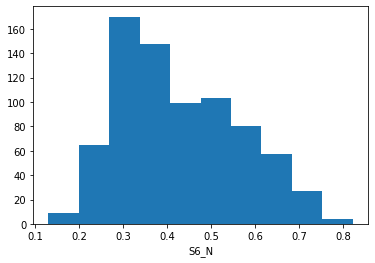

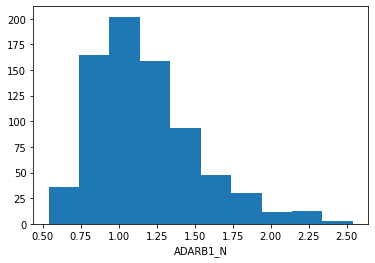

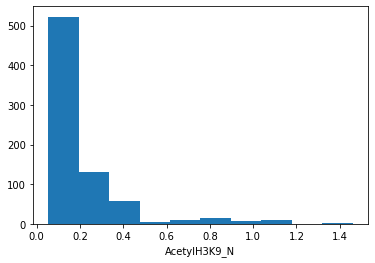

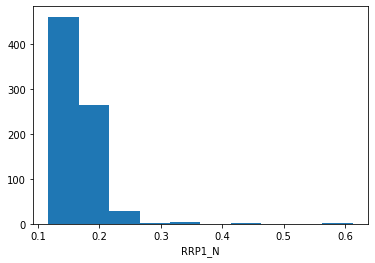

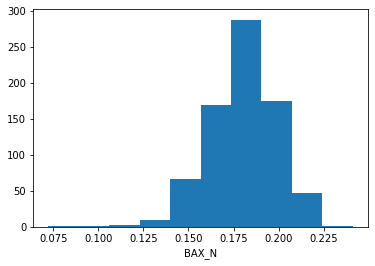

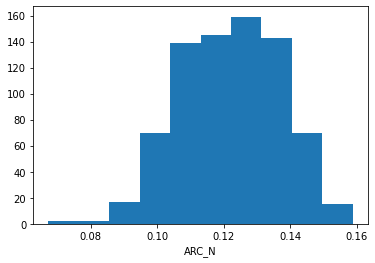

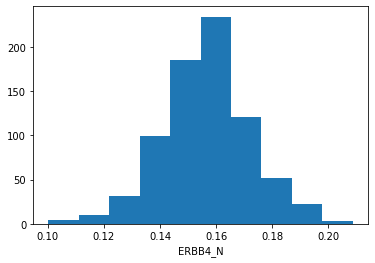

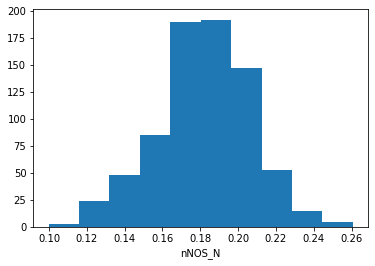

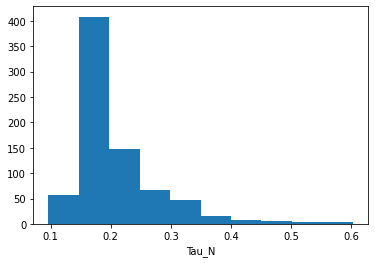

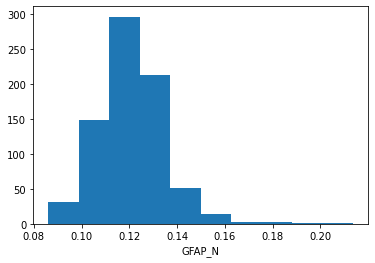

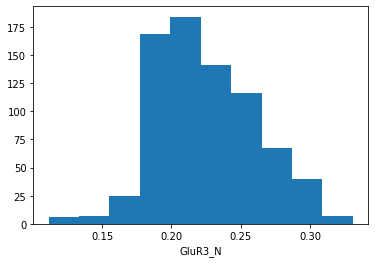

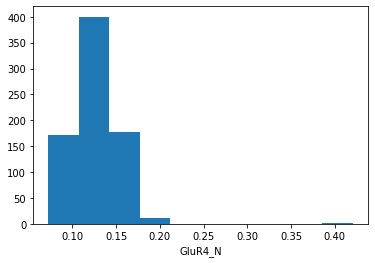

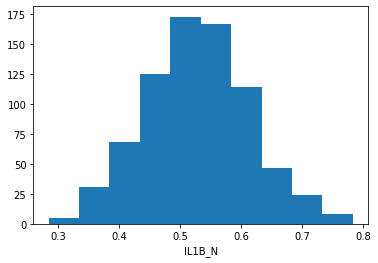

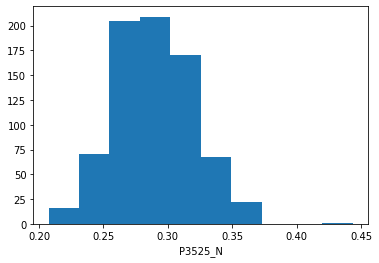

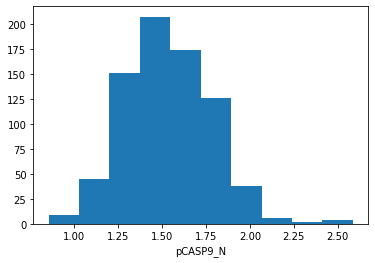

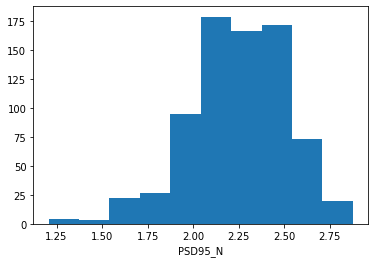

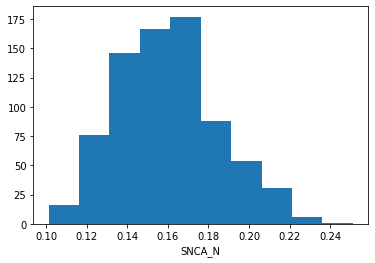

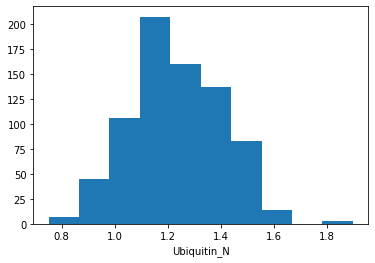

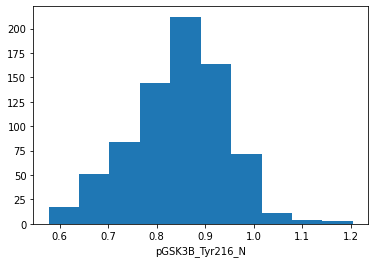

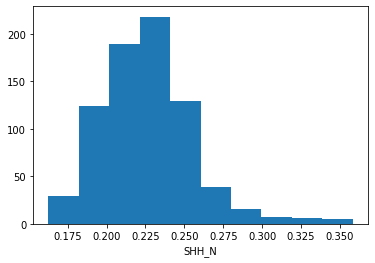

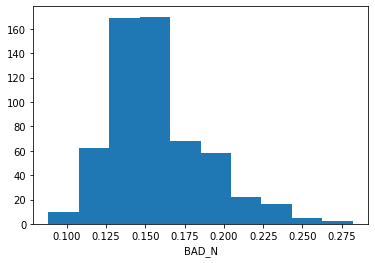

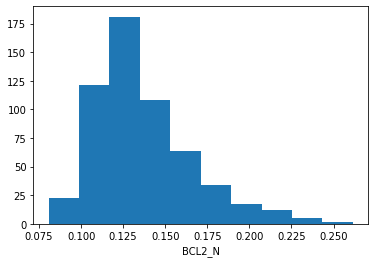

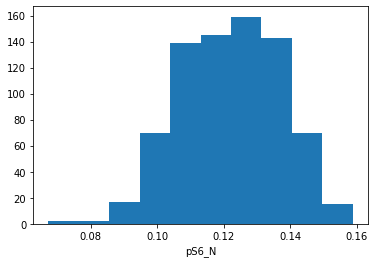

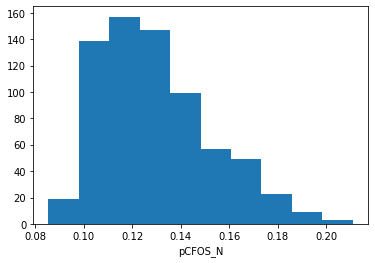

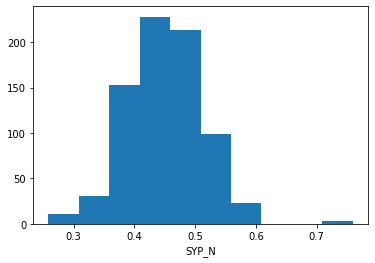

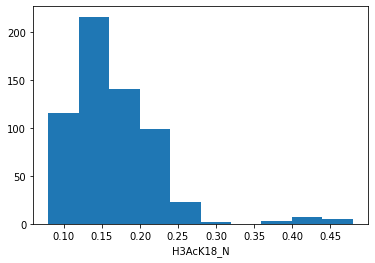

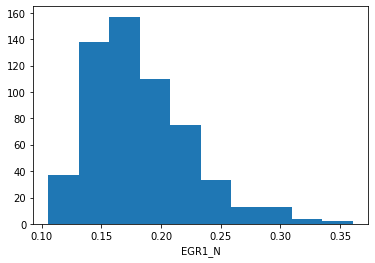

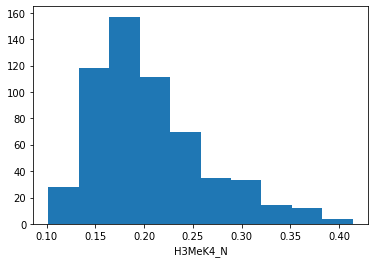

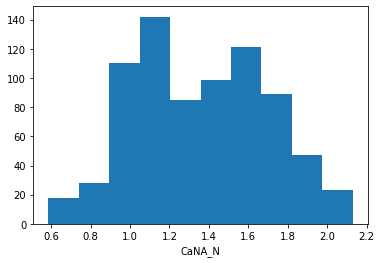

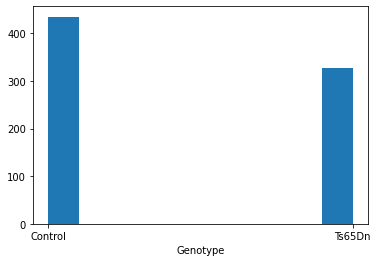

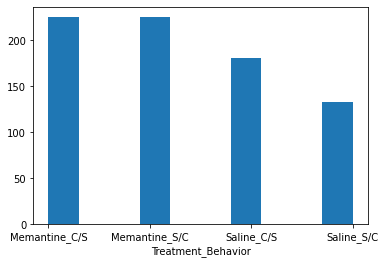

In [ ]:
for col in data_train.columns.values: #Calling columns from dataset

    #if(data_train[col].dtypes == 'float64') | (data_train[col].dtypes == 'object'): # defining data of the column
        plt.hist(data_train[col]) #plotting Histogram
        plt.xlabel(col) #label for x axis
        plt.show() #display plot

From histogram we observed that all variables have good spread over data

# **Correlation matrix**

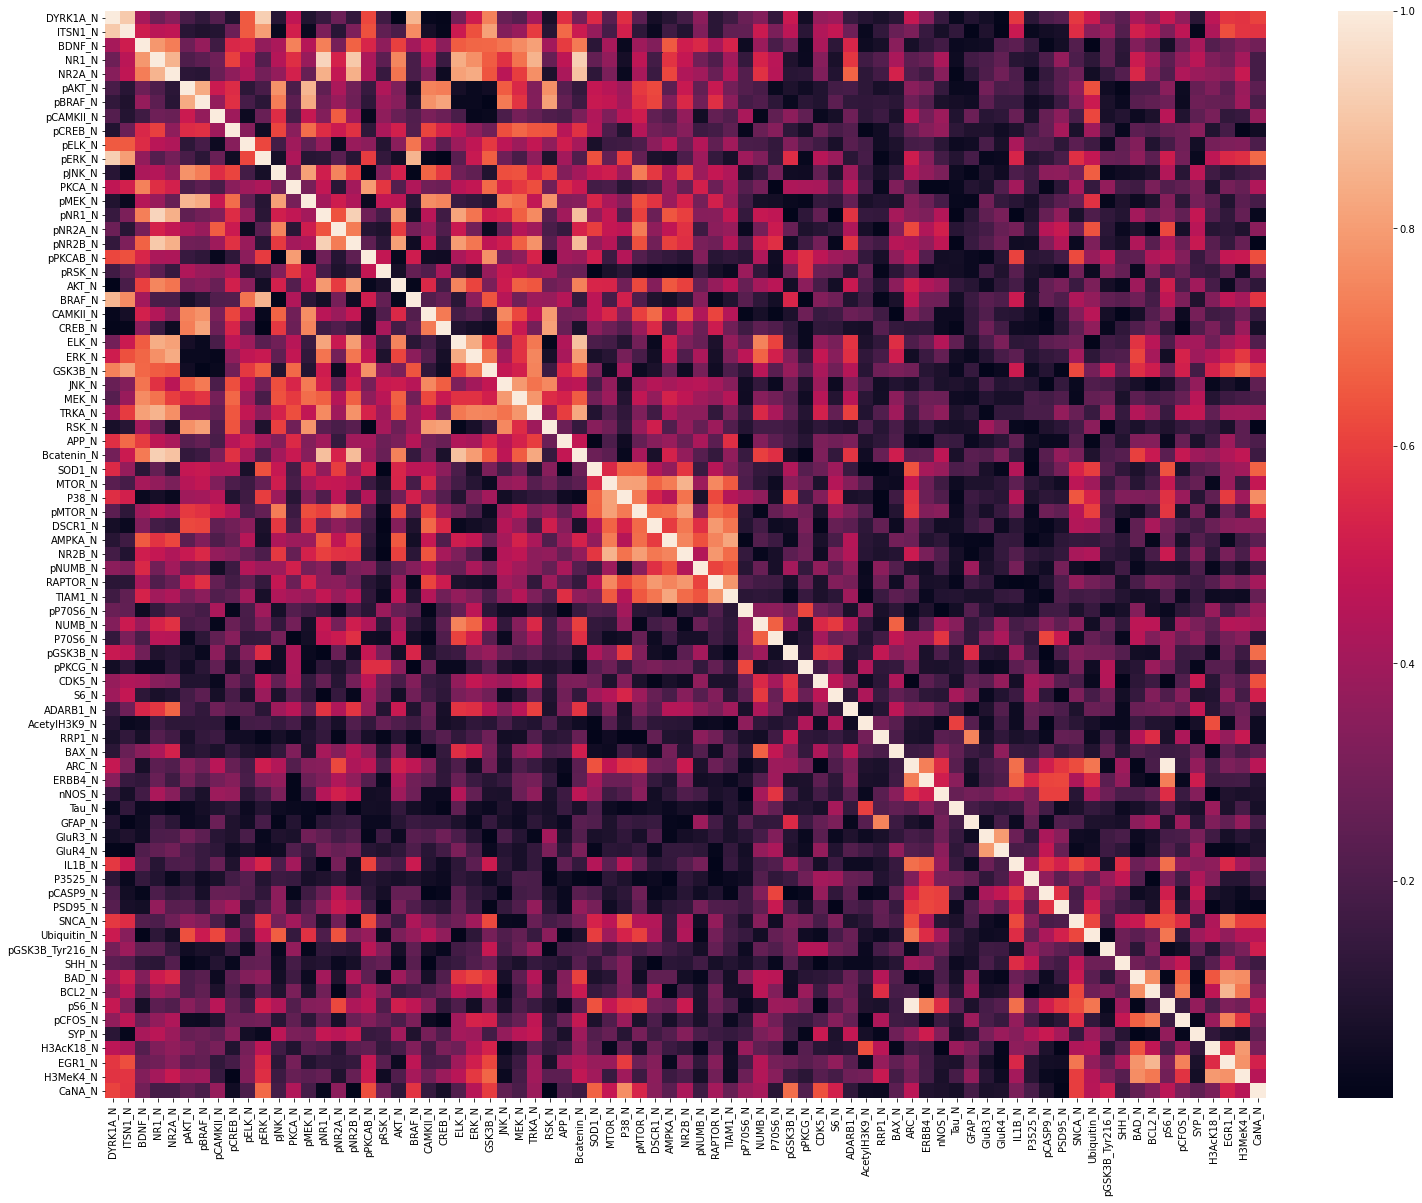

In [ ]:
corrMatrix = data_train.corr(method='spearman') # plot correlation plot. Spearman is used as data is non linear
fig, axw = plt.subplots(figsize=(26,20)) # Fig size
sns.heatmap(abs(corrMatrix), annot=False) #plot type
plt.show() # display plot

1.   ARC_N is strongly correlated with pS6_N(one of the either can be eliminated)




Making a deep copy of a data prevents the changes made in new dataframes to get reflected in original data

In [ ]:
data_train_1=data_train.copy(deep=True)
data_test_1=data_test.copy(deep=True)

In [ ]:
data_train_1.drop(['ARC_N'], axis=1, inplace=True)
data_test_1.drop(["ARC_N"], axis=1, inplace=True)

**Multi variate feature Iterative imputation for columns having NaN and null values**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imp=IterativeImputer(max_iter=100, random_state=0)

#impute missing values for training data
train_X =data_train_1.iloc[:,:-2]
X_train =iter_imp.fit_transform(train_X)

#impute missing values for test data
test_X =data_test_1.iloc[:,:-2]
X_test =iter_imp.fit_transform(test_X)


**Encoding categorical variables**



In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
'''
for binary class
'''
train_Y =data_train_1['Genotype'].values
test_Y =data_test_1['Genotype'].values
Y_train =lab_enc.fit_transform(train_Y)
Y_test =lab_enc.fit_transform(test_Y)
'''
for multi class
'''
train_4Y=data_train_1['Treatment_Behavior'].values
test_4Y=data_test_1['Treatment_Behavior'].values
Y4_train=lab_enc.fit_transform(train_4Y)
Y4_test=lab_enc.fit_transform(test_4Y)


# Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)

**Prediction using Elastic net logistic regression**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import ElasticNet
elastic_net_model= ElasticNet(random_state=42)
elastic_net_model.fit(X_train, Y_train) # fit the model
pred_train = np.array(elastic_net_model.predict(X_train), dtype=int) # predict the training and test data
pred_test = np.array(elastic_net_model.predict(X_test), dtype=int)
print('for binary class')
print(f1_score(Y_train,pred_train,average='micro'))
print(f1_score(Y_test,pred_test,average='micro'))
print('for multi class')
elastic_net_model.fit(X_train,Y4_train)
print(f1_score(Y4_train,pred_train,average='micro'))
print(f1_score(Y4_test,pred_test,average='micro'))




for binary class
0.5708661417322834
0.6
for multi class
0.2952755905511811
0.26666666666666666


**Prediction using Neural network with single ReLU hidden layer**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,),
                        activation='relu',
                        solver='adam',
                        alpha=0.0001,
                        batch_size='auto',
                        learning_rate='constant',
                        learning_rate_init=0.001,
                        power_t=0.5,
                        max_iter=200,
                        shuffle=True,
                        random_state=42,
                        tol=0.0001,
                        epsilon=1e-08)
clf.fit(X_train, Y_train) # fit the model
pred_train = np.array(np.argmax(clf.predict_proba(X_train), axis=1), dtype=int) # predict the training set
pred_test = np.array(np.argmax(clf.predict_proba(X_test), axis=1), dtype=int) # predict the test set
print('for binary class')
print(f1_score(Y_train,pred_train,average='micro'))
print(f1_score(Y_test,pred_test,average='micro'))
print('for multi class')
clf.fit(X_train,Y4_train)
print(f1_score(Y4_train,pred_train,average='micro'))
print(f1_score(Y4_test,pred_test,average='micro'))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


for binary class
0.9553805774278216
0.8533333333333335
for multi class
0.30971128608923887
0.08444444444444445


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Prediction using SVM**

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train) # fit the model
pred_train = np.array(clf.predict(X_train), dtype=int) # predict the training set
pred_test = np.array(clf.predict(X_test), dtype=int)
print('for binary class')
print(f1_score(Y_train,pred_train,average='micro'))
print(f1_score(Y_test,pred_test,average='micro'))
print('for multi class')
clf.fit(X_train,Y4_train)
print(f1_score(Y4_train,pred_train,average='micro'))
print(f1_score(Y4_test,pred_test,average='micro'))



for binary class
0.7926509186351706
0.7777777777777778
for multi class
0.2047244094488189
0.07111111111111111


**Prediction using Random classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0) # number of trees, max depth of each tree
clf.fit(X_train, Y_train) # fit the model
pred_train = np.array(clf.predict(X_train), dtype=int) # predict the training and test data
pred_test = np.array(clf.predict(X_test), dtype=int)
print('for binary class')
print(f1_score(Y_train,pred_train,average='micro'))
print(f1_score(Y_test,pred_test,average='micro'))
print('for multi class')
clf.fit(X_train,Y4_train)
print(f1_score(Y4_train,pred_train,average='micro'))
print(f1_score(Y4_test,pred_test,average='micro'))


for binary class
0.8503937007874016
0.6977777777777778
for multi class
0.24015748031496062
0.12444444444444444


# Observation
1. Best f1 score for binary class is come from neural network model
2. For multi class value of f1 score we are getting is very low

# References
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
5. https://towardsdatascience.com/data-exploration-and-analysis-using-python-e564473d7607